In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [2]:
feature = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","target","junk"]

In [3]:
os.chdir("C:/Users/ArrunPersonal/Codes/Semester7/IDS/NSL-KDD")

In [4]:
df1 = pd.read_csv("KDDTrain+.csv", names = feature)
df2 = pd.read_csv("KDDTest+.csv", names = feature)
df = pd.concat([df1, df2], axis=0)
df.drop(["junk"],axis = 1,inplace = True)

In [5]:
df2.isnull().values.any()

False

In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
protocol_dict = dict(zip(set(df['protocol_type']),np.arange(len(set(df['protocol_type'])))))
service_dict = dict(zip(set(df['service']),np.arange(len(set(df['service'])))))
flag_dict = dict(zip(set(df['flag']),np.arange(len(set(df['flag'])))))

In [8]:
# changing attack labels to their respective attack class
def change_feature(df):
    df.target.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
    df.target.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
    df.target.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
    df.target.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)
    
    df.protocol_type.replace(protocol_dict.keys(),protocol_dict.values(),inplace=True)
    df.service.replace(service_dict.keys(),service_dict.values(),inplace=True)
    df.flag.replace(flag_dict.keys(),flag_dict.values(),inplace=True)

In [9]:
change_feature(df)

In [10]:
target_dict = dict(zip(set(df['target']),np.arange(len(set(df['target'])))))

In [11]:
def change_target(df):
    df.target.replace(target_dict.keys(),target_dict.values(),inplace=True)

In [12]:
change_target(df)

In [13]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,2,56,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,0,50,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,2,4,3,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,2
3,0,2,60,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,2,60,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [14]:
df_lis = np.array(df.values.tolist())

In [15]:
from scipy.stats import pearsonr

In [16]:
features = np.array(df_lis[:,:-1])
labels = np.array(df_lis[:,-1])

In [17]:
scores = [abs(pearsonr(features[:,i],labels)[0]) for i in range(np.shape(features)[1])]

C:\Users\ArrunPersonal\anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [18]:
scores[19] = 0
scores

[0.08775643671995977,
 0.07881815239084643,
 0.5426400492912812,
 0.5424903235038371,
 0.009138275249077064,
 0.005789746611526592,
 0.005476010752776506,
 0.05681573933221903,
 0.000358380340789848,
 0.03178125977674937,
 0.10908211142510266,
 0.5931615342216647,
 0.009593767290877553,
 0.019152497945590236,
 0.01993868950900589,
 0.010667188036681556,
 0.017242092269547697,
 0.005087689116325897,
 0.03210638454588307,
 0,
 0.011509796575013364,
 0.08112366458845485,
 0.40285740473804754,
 0.045898970542846015,
 0.4229794374742941,
 0.42121364589439797,
 0.31097926123901976,
 0.30958358096718375,
 0.555184873922076,
 0.2687742893297809,
 0.04212001818358101,
 0.2720363010917916,
 0.6301248624045985,
 0.5640202537767519,
 0.3241081570536706,
 0.19450897491535854,
 0.14510002173052397,
 0.42466769857085374,
 0.4275714330600857,
 0.30222380417423295,
 0.3098381383256992]

In [19]:
act_features = []
act_indices = []
for i in range(len(scores)):
    if(scores[i]> 0.1):
        act_indices.append(i)
        act_features.append(features[:,i])

In [20]:
act_features = np.array(act_features).T

In [21]:
for i in range(np.shape(act_features)[1]):
    if(np.std(act_features[:,i])!=0):
        act_features[:,i] = (act_features[:,i]-np.mean(act_features[:,i]))/np.std(act_features[:,i]) 
    else:
        act_features[:,i] = (act_features[:,i]-np.mean(act_features[:,i]))
np.shape(act_features)

(148517, 21)

In [22]:
np.shape(features),np.shape(labels)

((148517, 41), (148517,))

In [23]:
train_X = np.array(act_features[:len(df1)])
test_X = np.array(act_features[len(df1):])
train_Y = labels[:len(df1)]
test_Y = labels[len(df1):]

In [24]:
from sklearn.model_selection import train_test_split 

In [25]:
train_X, val_X , train_Y ,val_Y = train_test_split(train_X,train_Y,random_state = 42,test_size = 0.1)

In [26]:
print(np.shape(train_X),np.shape(test_X),np.shape(val_X),np.shape(train_Y),np.shape(test_Y),np.shape(val_Y))

(113375, 21) (22544, 21) (12598, 21) (113375,) (22544,) (12598,)


# Stacked Convolutional Auto Encoder

### First Stack

In [27]:
from keras.layers import *
from keras.models import Model
from keras_self_attention import SeqSelfAttention

In [28]:
batch_size = 128
input_dim = (np.shape(train_X)[1],1)
input_layer = Input(shape=input_dim, name='input')
#Input Layer
LSTM_layer = LSTM(units=64,return_sequences=True)(input_layer)
attention = SeqSelfAttention(attention_activation='sigmoid')(LSTM_layer)
encoder1 = Conv1D (64,3)(attention)
encoder1 = MaxPooling1D(2)(encoder1)
#Encoder’s first dense layer
encoder2 = Conv1D (32,3)(encoder1)
encoder2 = MaxPooling1D(2)(encoder2)
# Code layer
latent_layer = Dense (32, name = 'latent_1')(encoder2)
# Decoder’s first dense layer
decoder1 = Conv1DTranspose (32,3)(latent_layer)
decoder1 = UpSampling1D(2)(decoder1)
# Decoder’s Third dense layer
decoder2 = Conv1DTranspose (64,3)(decoder1)
decoder2 = UpSampling1D(2)(decoder2)
flatten = Flatten()(decoder2)
# Output Layer
output_layer = Dense(input_dim[0])(flatten)
output_layer = Reshape((np.shape(train_X)[1],1), input_shape=(np.shape(train_X)[1],))(output_layer)

C:\Users\ArrunPersonal\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [29]:
autoencoder_1 = Model(inputs=input_layer, outputs=output_layer)
autoencoder_1.compile(metrics=tf.keras.metrics.RootMeanSquaredError(),loss='mse',optimizer='adam')

In [30]:
autoencoder_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 21, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 21, 64)            16896     
                                                                 
 seq_self_attention (SeqSelf  (None, 21, 64)           4161      
 Attention)                                                      
                                                                 
 conv1d (Conv1D)             (None, 19, 64)            12352     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 32)             6176  

In [31]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8,restore_best_weights=True)

In [32]:
stack_1 = autoencoder_1.fit(train_X, train_X, epochs=100, batch_size=batch_size,validation_data = (test_X,test_X),callbacks = [callback])

Epoch 1/100
886/886 [==============================] - 39s 39ms/step - loss: 0.2441 - root_mean_squared_error: 0.4940 - val_loss: 0.2170 - val_root_mean_squared_error: 0.4658
Epoch 2/100
886/886 [==============================] - 37s 42ms/step - loss: 0.0669 - root_mean_squared_error: 0.2586 - val_loss: 0.1323 - val_root_mean_squared_error: 0.3638
Epoch 3/100
886/886 [==============================] - 34s 39ms/step - loss: 0.0372 - root_mean_squared_error: 0.1929 - val_loss: 0.0822 - val_root_mean_squared_error: 0.2867
Epoch 4/100
886/886 [==============================] - 36s 41ms/step - loss: 0.0242 - root_mean_squared_error: 0.1555 - val_loss: 0.0690 - val_root_mean_squared_error: 0.2626
Epoch 5/100
886/886 [==============================] - 33s 37ms/step - loss: 0.0186 - root_mean_squared_error: 0.1364 - val_loss: 0.0627 - val_root_mean_squared_error: 0.2503
Epoch 6/100
886/886 [==============================] - 33s 37ms/step - loss: 0.0138 - root_mean_squared_error: 0.1176 - val_l

In [33]:
pred = autoencoder_1.predict(act_features)

4642/4642 [==============================] - 33s 7ms/step


In [34]:
np.shape(pred)

(148517, 21, 1)

In [35]:
from sklearn.metrics import *
import keras

In [36]:
layer_name = 'latent_1'
intermediate_layer_model = Model(inputs=autoencoder_1.input,
                                 outputs=autoencoder_1.get_layer(layer_name).output)
intermediate_output_1 = intermediate_layer_model.predict(act_features)

4642/4642 [==============================] - 31s 7ms/step


### Classifier Model

In [37]:
batch_size = 128
input_dim = np.shape(intermediate_output_1)[1:]
input_layer = Input(shape=(input_dim), name='input')
flatten = Flatten()(input_layer)
#Input Layer
dense1 = Dense (128, activation='relu')(flatten)
dense2 = Dense (64, activation='relu')(dense1)
dense3 = Dense (8, activation='relu')(dense2)
# Output Layer
classifier = Dense(len(set(train_Y)), activation='softmax')(dense3)

In [38]:
classify = Model(inputs=input_layer, outputs=classifier)
classify.compile(metrics=['accuracy'],loss='sparse_categorical_crossentropy',optimizer='adam')

In [39]:
classify.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 3, 32)]           0         
                                                                 
 flatten_1 (Flatten)         (None, 96)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               12416     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 8)                 520       
                                                                 
 dense_4 (Dense)             (None, 5)                 45        
                                                                 
Total params: 21,237
Trainable params: 21,237
Non-trainable

In [40]:
train_X = intermediate_output_1[:len(df1)]
test_X = intermediate_output_1[len(df1):]
train_Y = labels[:len(df1)]
test_Y = labels[len(df1):]

In [41]:
train_X, val_X , train_Y ,val_Y = train_test_split(train_X,train_Y,random_state = 42,test_size = 0.1)

In [42]:
val,counts = np.unique(np.array(labels,dtype = 'int16'),return_counts = True)
counts = 1 - counts/np.linalg.norm(counts)
new_counts = np.exp(counts)/np.sum(np.exp(counts))
label_dict = dict(zip(val,new_counts))

In [43]:
print(label_dict)

{0: 0.1157665343328575, 1: 0.2604755878915367, 2: 0.14856723519253837, 3: 0.22483904713398783, 4: 0.25035159544907976}


In [44]:
history = classify.fit(train_X, train_Y, epochs=100, batch_size=32,class_weight = label_dict, callbacks = [callback],validation_data = (val_X, val_Y))

Epoch 1/100
3543/3543 [==============================] - 9s 2ms/step - loss: 0.0190 - accuracy: 0.9701 - val_loss: 0.0730 - val_accuracy: 0.9786
Epoch 2/100
3543/3543 [==============================] - 3s 882us/step - loss: 0.0094 - accuracy: 0.9808 - val_loss: 0.0577 - val_accuracy: 0.9823
Epoch 3/100
3543/3543 [==============================] - 3s 820us/step - loss: 0.0079 - accuracy: 0.9833 - val_loss: 0.0524 - val_accuracy: 0.9841
Epoch 4/100
3543/3543 [==============================] - 3s 818us/step - loss: 0.0070 - accuracy: 0.9845 - val_loss: 0.0488 - val_accuracy: 0.9835
Epoch 5/100
3543/3543 [==============================] - 3s 824us/step - loss: 0.0065 - accuracy: 0.9852 - val_loss: 0.0471 - val_accuracy: 0.9843
Epoch 6/100
3543/3543 [==============================] - 3s 839us/step - loss: 0.0062 - accuracy: 0.9859 - val_loss: 0.0436 - val_accuracy: 0.9857
Epoch 7/100
3543/3543 [==============================] - 3s 834us/step - loss: 0.0057 - accuracy: 0.9867 - val_loss: 0.0

In [45]:
preds = classify.predict(intermediate_output_1)

4642/4642 [==============================] - 5s 978us/step


In [46]:
np.shape(preds),np.shape(labels)

((148517, 5), (148517,))

In [47]:
set(labels)

{0.0, 1.0, 2.0, 3.0, 4.0}

In [48]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(np.argmax(preds,axis = 1), labels)

In [49]:
print(accuracy_score(np.argmax(preds,axis = 1),labels))
print(precision_score(np.argmax(preds,axis = 1),labels,average = 'macro'))
print(recall_score(np.argmax(preds,axis = 1),labels,average = 'macro'))
print(f1_score(np.argmax(preds,axis = 1),labels,average = 'macro'))

0.9563686312004687
0.6882481455624527
0.8597009474783471
0.7344413084689982


In [50]:
import seaborn as sns

<AxesSubplot:>

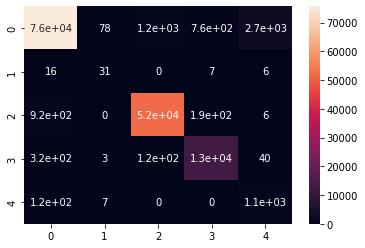

In [51]:
sns.heatmap(conf_mat, annot=True)

# Testing on KDD Test

In [52]:
features = act_features[len(df1):]
labels = labels[len(df1):]

In [53]:
print(np.shape(features),np.shape(labels))

(22544, 21) (22544,)


In [54]:
layer_name = 'latent_1'
intermediate_layer_model = Model(inputs=autoencoder_1.input,
                                 outputs=autoencoder_1.get_layer(layer_name).output)
intermediate_output_1 = intermediate_layer_model.predict(features)

705/705 [==============================] - 5s 6ms/step


In [55]:
np.shape(intermediate_output_1)

(22544, 3, 32)

In [56]:
final_prediction = classify.predict(intermediate_output_1)

705/705 [==============================] - 1s 1ms/step


In [57]:
np.shape(final_prediction),np.shape(labels)

((22544, 5), (22544,))

In [58]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(np.argmax(final_prediction,axis = 1), labels)

<AxesSubplot:>

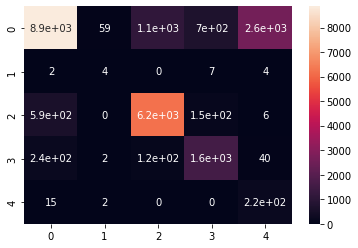

In [59]:
sns.heatmap(conf_mat, annot=True)

In [60]:
print(accuracy_score(np.argmax(final_prediction,axis = 1),labels))
print(precision_score(np.argmax(final_prediction,axis = 1),labels,average = 'macro'))
print(recall_score(np.argmax(final_prediction,axis = 1),labels,average = 'macro'))
print(f1_score(np.argmax(final_prediction,axis = 1),labels,average = 'macro'))

0.7480926188786373
0.505921670966418
0.7032998169568699
0.5162093966746049


In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(np.argmax(final_prediction,axis = 1),labels))

              precision    recall  f1-score   support

           0       0.91      0.66      0.77     13366
           1       0.06      0.24      0.10        17
           2       0.83      0.89      0.86      6953
           3       0.65      0.80      0.72      1971
           4       0.08      0.93      0.14       237

    accuracy                           0.75     22544
   macro avg       0.51      0.70      0.52     22544
weighted avg       0.86      0.75      0.79     22544

